# Sheridan Kamal

## DATA 73500 - Assignment 9

### Purpose
In this notebook we will be using music data from the generes of rock, jazz, rap, folk, and classical to train machine learning models. I will be training an additional machine learning model, a Decision Tree Classifier model, that I believe will outperform the given models.

### Data
The dataset is created by scraping data from the web. The Decision Tree Classifier model was chosen because this is essentially a classification problem with the classes being the music genres and this is why I believe it will outperform the other models since it is classification specific unlike the LinearSVC, MultinomialNB, and GaussianNB models.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import json
import math
import collections as cl
import matplotlib.pyplot as plt

!pip install boilerpipe3
from boilerpipe.extract import Extractor 


In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
wnl = nltk.WordNetLemmatizer()


### Reviews of Rock Records

In [4]:
URLs = [
       'https://pitchfork.com/reviews/albums/david-bowie-changesnowbowie/',
       'https://pitchfork.com/reviews/albums/flat-worms-antarctica/',
       'https://pitchfork.com/reviews/albums/skylar-gudasz-cinema/',
       'https://pitchfork.com/reviews/albums/sir-richard-bishop-oneiric-formulary/',
       'https://pitchfork.com/reviews/albums/talking-heads-fear-of-music/',
       'https://pitchfork.com/reviews/albums/talking-heads-talking-heads-77/',
       'https://pitchfork.com/reviews/albums/talking-heads-more-songs-about-buildings-and-food/',
       'https://pitchfork.com/reviews/albums/talking-heads-speaking-in-tongues/',
       'https://pitchfork.com/reviews/albums/talking-heads-little-creatures/',
       'https://pitchfork.com/reviews/albums/the-howling-hex-knuckleball-express/'
]

rock_reviews = []
for URL in URLs:
    print(URL)
    extractor = Extractor(extractor = 'ArticleSentencesExtractor', url = URL) 
    rock_reviews.append(extractor.getText())

rock_reviews = str(rock_reviews)
rock_reviews = rock_reviews.replace('\\n', ' ')

rock_tokens = nltk.word_tokenize(rock_reviews)
rock_tokens2 = [t.lower() for t in rock_tokens if len(t) > 3] 
lemma_rock = [wnl.lemmatize(t) for t in rock_tokens2]

print(len(lemma_rock))


https://pitchfork.com/reviews/albums/david-bowie-changesnowbowie/
https://pitchfork.com/reviews/albums/flat-worms-antarctica/
https://pitchfork.com/reviews/albums/skylar-gudasz-cinema/
https://pitchfork.com/reviews/albums/sir-richard-bishop-oneiric-formulary/
https://pitchfork.com/reviews/albums/talking-heads-fear-of-music/
https://pitchfork.com/reviews/albums/talking-heads-talking-heads-77/
https://pitchfork.com/reviews/albums/talking-heads-more-songs-about-buildings-and-food/
https://pitchfork.com/reviews/albums/talking-heads-speaking-in-tongues/
https://pitchfork.com/reviews/albums/talking-heads-little-creatures/
https://pitchfork.com/reviews/albums/the-howling-hex-knuckleball-express/
5873


In [0]:
URL = 'https://pitchfork.com/reviews/albums/david-bowie-changesnowbowie/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rock_0 = extractor.getText()
tokens_rock_0 = nltk.word_tokenize(rock_0)
tokens2_rock_0 = [t.lower() for t in tokens_rock_0 if len(t) > 3] 
lemma_rock_0 = [wnl.lemmatize(t) for t in tokens2_rock_0]

In [0]:
URL = 'https://pitchfork.com/reviews/albums/flat-worms-antarctica/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rock_1 = extractor.getText()
tokens_rock_1 = nltk.word_tokenize(rock_1)
tokens2_rock_1 = [t.lower() for t in tokens_rock_1 if len(t) > 3] 
lemma_rock_1 = [wnl.lemmatize(t) for t in tokens2_rock_1]

In [0]:
URL = 'https://pitchfork.com/reviews/albums/skylar-gudasz-cinema/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rock_2 = extractor.getText()
tokens_rock_2 = nltk.word_tokenize(rock_2)
tokens2_rock_2 = [t.lower() for t in tokens_rock_2 if len(t) > 3] 
lemma_rock_2 = [wnl.lemmatize(t) for t in tokens2_rock_2]

In [0]:
URL = 'https://pitchfork.com/reviews/albums/sir-richard-bishop-oneiric-formulary/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rock_3 = extractor.getText()
tokens_rock_3 = nltk.word_tokenize(rock_3)
tokens2_rock_3 = [t.lower() for t in tokens_rock_3 if len(t) > 3] 
lemma_rock_3 = [wnl.lemmatize(t) for t in tokens2_rock_3]

In [0]:
URL = 'https://pitchfork.com/reviews/albums/talking-heads-fear-of-music/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rock_4 = extractor.getText()
tokens_rock_4 = nltk.word_tokenize(rock_2)
tokens2_rock_4 = [t.lower() for t in tokens_rock_4 if len(t) > 3] 
lemma_rock_4 = [wnl.lemmatize(t) for t in tokens2_rock_4]

In [0]:
URL = 'https://pitchfork.com/reviews/albums/talking-heads-talking-heads-77/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rock_5 = extractor.getText()
tokens_rock_5 = nltk.word_tokenize(rock_5)
tokens2_rock_5 = [t.lower() for t in tokens_rock_5 if len(t) > 3] 
lemma_rock_5 = [wnl.lemmatize(t) for t in tokens2_rock_5]

In [0]:
URL = 'https://pitchfork.com/reviews/albums/talking-heads-more-songs-about-buildings-and-food/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rock_6 = extractor.getText()
tokens_rock_6 = nltk.word_tokenize(rock_6)
tokens2_rock_6 = [t.lower() for t in tokens_rock_6 if len(t) > 3] 
lemma_rock_6 = [wnl.lemmatize(t) for t in tokens2_rock_6]

In [0]:
URL = 'https://pitchfork.com/reviews/albums/talking-heads-speaking-in-tongues/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rock_7 = extractor.getText()
tokens_rock_7 = nltk.word_tokenize(rock_7)
tokens2_rock_7 = [t.lower() for t in tokens_rock_7 if len(t) > 3] 
lemma_rock_7 = [wnl.lemmatize(t) for t in tokens2_rock_7]

In [0]:
URL = 'https://pitchfork.com/reviews/albums/talking-heads-little-creatures/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rock_8 = extractor.getText()
tokens_rock_8 = nltk.word_tokenize(rock_8)
tokens2_rock_8 = [t.lower() for t in tokens_rock_8 if len(t) > 3] 
lemma_rock_8 = [wnl.lemmatize(t) for t in tokens2_rock_8]

In [0]:
URL = 'https://pitchfork.com/reviews/albums/the-howling-hex-knuckleball-express/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rock_9 = extractor.getText()
tokens_rock_9 = nltk.word_tokenize(rock_9)
tokens2_rock_9 = [t.lower() for t in tokens_rock_9 if len(t) > 3] 
lemma_rock_9 = [wnl.lemmatize(t) for t in tokens2_rock_9]

### Reviews of Jazz Records

In [0]:
URL = 'https://pitchfork.com/reviews/albums/pharoah-sanders-live-in-paris-1975/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
jazz_0 = extractor.getText()
tokens_jazz_0 = nltk.word_tokenize(jazz_0)
tokens2_jazz_0 = [t.lower() for t in tokens_jazz_0 if len(t) > 3] 
lemma_jazz_0 = [wnl.lemmatize(t) for t in tokens2_jazz_0]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/nina-simone-fodder-on-my-wings/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
jazz_1 = extractor.getText()
tokens_jazz_1 = nltk.word_tokenize(jazz_1)
tokens2_jazz_1 = [t.lower() for t in tokens_jazz_1 if len(t) > 3] 
lemma_jazz_1 = [wnl.lemmatize(t) for t in tokens2_jazz_1]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/thundercat-it-is-what-it-is/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
jazz_2 = extractor.getText()
tokens_jazz_2 = nltk.word_tokenize(jazz_2)
tokens2_jazz_2 = [t.lower() for t in tokens_jazz_2 if len(t) > 3] 
lemma_jazz_2 = [wnl.lemmatize(t) for t in tokens2_jazz_2]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/shabaka-and-the-ancestors-we-are-sent-here-by-history/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
jazz_3 = extractor.getText()
tokens_jazz_3 = nltk.word_tokenize(jazz_3)
tokens2_jazz_3 = [t.lower() for t in tokens_jazz_3 if len(t) > 3] 
lemma_jazz_3 = [wnl.lemmatize(t) for t in tokens2_jazz_3]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/irreversible-entanglements-who-sent-you/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
jazz_4 = extractor.getText()
tokens_jazz_4 = nltk.word_tokenize(jazz_4)
tokens2_jazz_4 = [t.lower() for t in tokens_jazz_4 if len(t) > 3] 
lemma_jazz_4 = [wnl.lemmatize(t) for t in tokens2_jazz_4]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/tony-allen-hugh-masekela-rejoice/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
jazz_5 = extractor.getText()
tokens_jazz_5 = nltk.word_tokenize(jazz_5)
tokens2_jazz_5 = [t.lower() for t in tokens_jazz_5 if len(t) > 3] 
lemma_jazz_5 = [wnl.lemmatize(t) for t in tokens2_jazz_5]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/sam-gendel-satin-doll/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
jazz_6 = extractor.getText()
tokens_jazz_6 = nltk.word_tokenize(jazz_6)
tokens2_jazz_6 = [t.lower() for t in tokens_jazz_6 if len(t) > 3] 
lemma_jazz_6 = [wnl.lemmatize(t) for t in tokens2_jazz_6]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/kassa-overall-i-think-im-good/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
jazz_7 = extractor.getText()
tokens_jazz_7 = nltk.word_tokenize(jazz_7)
tokens2_jazz_7 = [t.lower() for t in tokens_jazz_7 if len(t) > 3] 
lemma_jazz_7 = [wnl.lemmatize(t) for t in tokens2_jazz_7]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/jeremy-cunningham-the-weather-up-there/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
jazz_8 = extractor.getText()
tokens_jazz_8 = nltk.word_tokenize(jazz_8)
tokens2_jazz_8 = [t.lower() for t in tokens_jazz_8 if len(t) > 3] 
lemma_jazz_8 = [wnl.lemmatize(t) for t in tokens2_jazz_8]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/rashied-ali-quintet-rashied-ali-fran-first-time-out-live-at-slugs-1967-duo-exchange-complete-sessions/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
jazz_9 = extractor.getText()
tokens_jazz_9 = nltk.word_tokenize(jazz_9)
tokens2_jazz_9 = [t.lower() for t in tokens_jazz_9 if len(t) > 3] 
lemma_jazz_9 = [wnl.lemmatize(t) for t in tokens2_jazz_9]


### Reviews of HipHop Records

In [0]:
URL = 'https://pitchfork.com/reviews/albums/quelle-chris-innocent-country-2/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rap_0 = extractor.getText()
tokens_rap_0 = nltk.word_tokenize(rap_0)
tokens2_rap_0 = [t.lower() for t in tokens_rap_0 if len(t) > 3] 
lemma_rap_0 = [wnl.lemmatize(t) for t in tokens2_rap_0]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/serengeti-ajai/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rap_1 = extractor.getText()
tokens_rap_1 = nltk.word_tokenize(rap_1)
tokens2_rap_1 = [t.lower() for t in tokens_rap_1 if len(t) > 3] 
lemma_rap_1 = [wnl.lemmatize(t) for t in tokens2_rap_1]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/westside-gunn-pray-for-paris/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rap_2 = extractor.getText()
tokens_rap_2 = nltk.word_tokenize(rap_2)
tokens2_rap_2 = [t.lower() for t in tokens_rap_2 if len(t) > 3] 
lemma_rap_2 = [wnl.lemmatize(t) for t in tokens2_rap_2]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/dababy-blame-it-on-baby/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rap_3 = extractor.getText()
tokens_rap_3 = nltk.word_tokenize(rap_3)
tokens2_rap_3 = [t.lower() for t in tokens_rap_3 if len(t) > 3] 
lemma_rap_3 = [wnl.lemmatize(t) for t in tokens2_rap_3]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/shabazz-palaces-the-don-of-diamond-dreams/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rap_4 = extractor.getText()
tokens_rap_4 = nltk.word_tokenize(rap_4)
tokens2_rap_4 = [t.lower() for t in tokens_rap_4 if len(t) > 3] 
lemma_rap_4 = [wnl.lemmatize(t) for t in tokens2_rap_4]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/pink-siifu-negro/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rap_5 = extractor.getText()
tokens_rap_5 = nltk.word_tokenize(rap_5)
tokens2_rap_5 = [t.lower() for t in tokens_rap_5 if len(t) > 3] 
lemma_rap_5 = [wnl.lemmatize(t) for t in tokens2_rap_5]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/22gz-growth-and-development/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rap_6 = extractor.getText()
tokens_rap_6 = nltk.word_tokenize(rap_6)
tokens2_rap_6 = [t.lower() for t in tokens_rap_6 if len(t) > 3] 
lemma_rap_6 = [wnl.lemmatize(t) for t in tokens2_rap_6]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/ghostie-self-hate-wraith/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rap_7 = extractor.getText()
tokens_rap_7 = nltk.word_tokenize(rap_7)
tokens2_rap_7 = [t.lower() for t in tokens_rap_7 if len(t) > 3] 
lemma_rap_7 = [wnl.lemmatize(t) for t in tokens2_rap_7]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/nnamdi-brat/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rap_8 = extractor.getText()
tokens_rap_8 = nltk.word_tokenize(rap_8)
tokens2_rap_8 = [t.lower() for t in tokens_rap_8 if len(t) > 3] 
lemma_rap_8 = [wnl.lemmatize(t) for t in tokens2_rap_8]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/rod-wave-pray-4-love/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
rap_9 = extractor.getText()
tokens_rap_9 = nltk.word_tokenize(rap_9)
tokens2_rap_9 = [t.lower() for t in tokens_rap_9 if len(t) > 3] 
lemma_rap_9 = [wnl.lemmatize(t) for t in tokens2_rap_9]


### Reviews of Classical Records

In [0]:
URL = 'https://www.allmusic.com/album/beethoven-symphonien-nos-5-7-mw0001797938' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
classical_0 = extractor.getText()
tokens_classical_0 = nltk.word_tokenize(classical_0)
tokens2_classical_0 = [t.lower() for t in tokens_classical_0 if len(t) > 3] 
lemma_classical_0 = [wnl.lemmatize(t) for t in tokens2_classical_0]


In [0]:
URL = 'https://www.allmusic.com/album/la-mer-afternoon-of-a-faun-jeux-two-nocturnes-mw0000952966' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
classical_1 = extractor.getText()
tokens_classical_1 = nltk.word_tokenize(classical_1)
tokens2_classical_1 = [t.lower() for t in tokens_classical_1 if len(t) > 3] 
lemma_classical_1 = [wnl.lemmatize(t) for t in tokens2_classical_1]


In [0]:
URL = 'https://www.allmusic.com/album/bach-brandenburg-concertos-orchestral-suites-mw0001946060' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
classical_2 = extractor.getText()
tokens_classical_2 = nltk.word_tokenize(classical_2)
tokens2_classical_2 = [t.lower() for t in tokens_classical_2 if len(t) > 3] 
lemma_classical_2 = [wnl.lemmatize(t) for t in tokens2_classical_2]


In [0]:
URL = 'https://www.allmusic.com/album/bach-cello-suites-nos-1-4-5-mw0001801523' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
classical_3 = extractor.getText()
tokens_classical_3 = nltk.word_tokenize(classical_3)
tokens2_classical_3 = [t.lower() for t in tokens_classical_3 if len(t) > 3] 
lemma_classical_3 = [wnl.lemmatize(t) for t in tokens2_classical_3]


In [0]:
URL = 'https://www.allmusic.com/album/philip-glass-music-in-twelve-parts-mw0000635208' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
classical_4 = extractor.getText()
tokens_classical_4 = nltk.word_tokenize(classical_4)
tokens2_classical_4 = [t.lower() for t in tokens_classical_4 if len(t) > 3] 
lemma_classical_4 = [wnl.lemmatize(t) for t in tokens2_classical_4]


In [0]:
URL = 'https://www.allmusic.com/album/richard-strauss-orchestral-works-mw0001389382' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
classical_5 = extractor.getText()
tokens_classical_5 = nltk.word_tokenize(classical_5)
tokens2_classical_5 = [t.lower() for t in tokens_classical_5 if len(t) > 3] 
lemma_classical_5 = [wnl.lemmatize(t) for t in tokens2_classical_5]


In [0]:
URL = 'https://www.allmusic.com/album/handel-messiah-highlights-mw0000937304' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
classical_6 = extractor.getText()
tokens_classical_6 = nltk.word_tokenize(classical_6)
tokens2_classical_6 = [t.lower() for t in tokens_classical_6 if len(t) > 3] 
lemma_classical_6 = [wnl.lemmatize(t) for t in tokens2_classical_6]


In [0]:
URL = 'https://www.allmusic.com/album/ravel-piano-concerto-rachmaninov-piano-concerto-no-4-mw0001829304' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
classical_7 = extractor.getText()
tokens_classical_7 = nltk.word_tokenize(classical_7)
tokens2_classical_7 = [t.lower() for t in tokens_classical_7 if len(t) > 3] 
lemma_classical_7 = [wnl.lemmatize(t) for t in tokens2_classical_7]


In [0]:
URL = 'https://www.allmusic.com/album/franck-violin-sonata-brahms-horn-trio-mw0001802471' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
classical_8 = extractor.getText()
tokens_classical_8 = nltk.word_tokenize(classical_8)
tokens2_classical_8 = [t.lower() for t in tokens_classical_8 if len(t) > 3] 
lemma_classical_8 = [wnl.lemmatize(t) for t in tokens2_classical_8]


In [0]:
URL = 'https://www.allmusic.com/album/martha-argerich-the-collection-vol-1-the-solo-recordings-mw0001871242' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
classical_9 = extractor.getText()
tokens_classical_9 = nltk.word_tokenize(classical_9)
tokens2_classical_9 = [t.lower() for t in tokens_classical_9 if len(t) > 3] 
lemma_classical_9 = [wnl.lemmatize(t) for t in tokens2_classical_9]


### Reviews of Folk/Country Records

In [0]:
URL = 'https://pitchfork.com/reviews/albums/james-elkington-ever-roving-eye/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
folk_0 = extractor.getText()
tokens_folk_0 = nltk.word_tokenize(folk_0)
tokens2_folk_0 = [t.lower() for t in tokens_folk_0 if len(t) > 3] 
lemma_folk_0 = [wnl.lemmatize(t) for t in tokens2_folk_0]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/laura-marling-song-for-our-daughter/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
folk_1 = extractor.getText()
tokens_folk_1 = nltk.word_tokenize(folk_1)
tokens2_folk_1 = [t.lower() for t in tokens_folk_1 if len(t) > 3] 
lemma_folk_1 = [wnl.lemmatize(t) for t in tokens2_folk_1]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/mosses-tv-sun/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
folk_2 = extractor.getText()
tokens_folk_2 = nltk.word_tokenize(folk_2)
tokens2_folk_2 = [t.lower() for t in tokens_folk_2 if len(t) > 3] 
lemma_folk_2 = [wnl.lemmatize(t) for t in tokens2_folk_2]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/sufjan-stevens-lowell-brams-aporia/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
folk_3 = extractor.getText()
tokens_folk_3 = nltk.word_tokenize(folk_3)
tokens2_folk_3 = [t.lower() for t in tokens_folk_3 if len(t) > 3] 
lemma_folk_3 = [wnl.lemmatize(t) for t in tokens2_folk_3]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/sam-hunt-southside/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
folk_4 = extractor.getText()
tokens_folk_4 = nltk.word_tokenize(folk_4)
tokens2_folk_4 = [t.lower() for t in tokens_folk_4 if len(t) > 3] 
lemma_folk_4 = [wnl.lemmatize(t) for t in tokens2_folk_4]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/james-elkington-ever-roving-eye/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
folk_5 = extractor.getText()
tokens_folk_5 = nltk.word_tokenize(folk_5)
tokens2_folk_5 = [t.lower() for t in tokens_folk_5 if len(t) > 3] 
lemma_folk_5 = [wnl.lemmatize(t) for t in tokens2_folk_5]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/cocorosie-put-the-shine-on/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
folk_6 = extractor.getText()
tokens_folk_6 = nltk.word_tokenize(folk_6)
tokens2_folk_6 = [t.lower() for t in tokens_folk_6 if len(t) > 3] 
lemma_folk_6 = [wnl.lemmatize(t) for t in tokens2_folk_6]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/william-tyler-music-from-first-cow/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
folk_7 = extractor.getText()
tokens_folk_7 = nltk.word_tokenize(folk_7)
tokens2_folk_7 = [t.lower() for t in tokens_folk_7 if len(t) > 3] 
lemma_folk_7 = [wnl.lemmatize(t) for t in tokens2_folk_7]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/brandy-clark-your-life-is-a-record/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
folk_8 = extractor.getText()
tokens_folk_8 = nltk.word_tokenize(folk_8)
tokens2_folk_8 = [t.lower() for t in tokens_folk_8 if len(t) > 3] 
lemma_folk_8 = [wnl.lemmatize(t) for t in tokens2_folk_8]


In [0]:
URL = 'https://pitchfork.com/reviews/albums/katie-pruitt-expectations/' 
extractor = Extractor(extractor = 'ArticleExtractor', url = URL) 
#print(extractor.getText())
folk_9 = extractor.getText()
tokens_folk_9 = nltk.word_tokenize(folk_9)
tokens2_folk_9 = [t.lower() for t in tokens_folk_9 if len(t) > 3] 
lemma_folk_9 = [wnl.lemmatize(t) for t in tokens2_folk_9]


In [0]:
rock_terms = set(['acid', 'arena', 'beat', 'garage', 'glam', 'metal', 'indie', 'prog', 'psychedelic', 'punk', 'surf'])
jazz_terms = set(['avant-garde', 'bebop', 'cool', 'free', 'bop', 'Latin', 'swing', 'improv', 'saxophone', 'trumpet'])
rap_terms = set(['bounce', 'chopped', 'crunk', 'freestyle', 'gangsta', 'g-funk', 'trip', 'turntablism', 'mc', 'dj'])
classical_terms = set(['concerto', 'symphony', 'sonata', 'opera', 'chamber', 'conductor', 'string', 'woodwind', 'brass', 'percussion'])
folk_terms = set(['anti-war', 'protest', 'shanty', 'bluegrass', 'cajun', 'cowboy', 'nashville', 'swamp', 'blues', 'zydeco'])


['share', 'twitter', 'open', 'share', 'drawer', 'this', 'cozy', 'stripped-back', 'rehearsal', 'recording', 'later', 'broadcast', '1997', 'special', 'find', 'bowie', 'valedictory', 'mood', 'david', 'bowie', 'first', 'greatest-hits', 'called', 'changesonebowie', 'title', 'proven', 'irresistible', 'compiler', 'that', 'collection', 'followed', '1981', 'changestwobowie', '1990', 'changesbowie', '1997', 'radio', 'special', 'changesnowbowie', 'interspersing', 'clip', 'long', 'interview', 'with', 'mary', 'anne', 'hobbs', 'with', 'exclusive', 'performance', 'recorded', 'during', 'november', '1996', 'rehearsal', '50th-birthday', 'concert', 'madison', 'square', 'garden', 'changesnowbowie', 'originally', 'aired', 'radio', 'week', 'bowie', 'birthday', 'bowie', 'feeling', 'valedictory', 'time', 'mood', 'that', 'came', 'through', 'both', 'musing', 'interview', 'laid-back', 'performance', 'backed', 'only', 'guitarist', 'reef', 'gabrels', 'bassist/vocalist', 'gail', 'dorsey', 'keyboardist', 'mark', 'pl

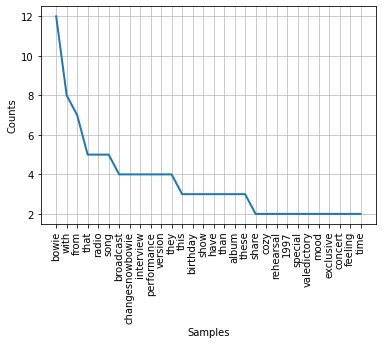

310


In [56]:
print(lemma_rock_0)
lemma_rock_0_freq = nltk.FreqDist(lemma_rock_0)
lemma_rock_0_freq.plot(30, cumulative=False)
vocab_rock_0 = set(lemma_rock_0)
print(len(vocab_rock_0))

['share', 'twitter', 'open', 'share', 'drawer', 'pharoah', 'sander', 'group', 'rolled', 'best', 'quality', 'from', 'early-1970s', 'into', 'newly', 'reissued', 'that', 'burst', 'with', 'discovery', 'concert', 'that', 'sound', 'more', 'like', 'party', 'than', 'seance', 'when', 'pharoah', 'sander', 'played', 'tenor', 'saxophone', 'with', 'john', 'coltrane', '1960s', 'tone', 'harsh', 'wild', 'soloing', 'alongside', 'coltrane', 'record', 'like', 'ascension', 'live', 'japan', 'sander', 'horn', 'would', 'shriek', 'howl', 'reaching', 'pitch', 'earth-shaking', 'intensity', 'piece', 'that', 'pushed', 'jazz', 'limit', 'legibility', 'after', 'coltrane', 'death', '1967', 'sander', 'began', 'exploring', 'different', 'path', 'playing', 'with', 'alice', 'coltrane', 'ptah', 'daoud', 'journey', 'satchidananda', 'album', 'impulse', 'label', 'sound', 'still', 'searching', 'lyrical', 'musical', 'setting', 'often', 'included', 'trance-inducing', 'groove', 'after', 'half-decade', 'enduring', 'blast', 'furnac

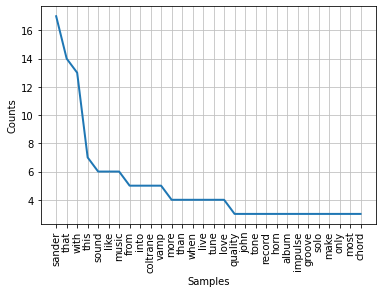

407


In [57]:
print(lemma_jazz_0)
lemma_jazz_0_freq = nltk.FreqDist(lemma_jazz_0)
lemma_jazz_0_freq.plot(30, cumulative=False)
vocab_jazz_0 = set(lemma_jazz_0)
print(len(vocab_jazz_0))

['bandcamp', 'never', 'catch', 'quelle', 'chris', 'doing', 'what', 'expected', 'bohemian', 'detroit', 'rapper-producer', 'level', 'excellence', 'both', 'jean', 'grae', 'joint', 'project', 'everything', 'fine', 'gun', 'meditation', 'american', 'violence', 'back', 'those', 'win', 'sequel', 'innocent', 'country', '—the', '2015', 'collaboration', 'with', 'producer', 'chris', 'keys—seemed', 'unlikely', 'unnecessary', 'take', 'from', 'quelle', 'chris', 'himself', 'when', 'ranking', 'project', 'back', '2017', 'vice', 'placed', 'record', 'fourth', 'six-album', 'list', 'pair', 'enjoy', 'relationship', 'buddy', 'naturally', 'cozy', 'each', 'other', 'presence', 'think', 'that', 'time', 'would', 'chris', 'spot', 'oakland', 'just', 'smoke', 'chill', 'watch', 'random', 'shit', 'food', 'listen', 'some', 'music', 'make', 'some', 'beat', 'write', 'song', 'repeat', 'quelle', 'told', 'vice', 'sequel', 'pair', 'recapture', 'this', 'easy', 'chemistry', 'serving', 'blissful', 'buzzed-on-beer', 'snooze', 'su

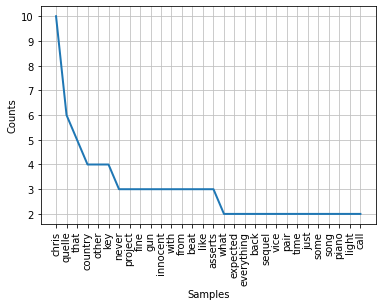

282


In [58]:
print(lemma_rap_0)
lemma_rap_0_freq = nltk.FreqDist(lemma_rap_0)
lemma_rap_0_freq.plot(30, cumulative=False)
vocab_rap_0 = set(lemma_rap_0)
print(len(vocab_rap_0))

['tumblr', 'allmusic', 'review', 'blair', 'sanderson', 'recommendable', 'album', 'anyone', 'could', 'wish', 'carlos', 'kleiber', 'performance', 'with', 'vienna', 'philharmonic', 'ludwig', 'beethoven', 'symphony', 'minor', 'symphony', 'major', 'classic', 'that', 'should', 'always', 'within', 'reach', 'this', 'disc', 'should', 'passed', 'along', 'friend', 'single', 'best', 'pairing', 'these', 'piece', 'other', 'performance', 'these', 'symphony', 'absolutely', 'essential', 'know', 'recording', 'many', 'great', 'conductor', 'orchestra', 'certainly', 'compete', 'with', 'this', 'deutsche', 'grammophon', 'album', 'listener', 'affection', 'sheer', 'excitement', 'cogent', 'direction', 'expressive', 'playing', 'none', 'more', 'convincing', 'kleiber', 'highly', 'esteemed', 'thorough', 'musicianship', 'clarity', 'interpretation', 'communication', 'skill', 'with', 'musician', 'resulted', 'performance', 'that', 'were', 'compelling', 'their', 'power', 'fascinating', 'their', 'faithfulness', 'detail',

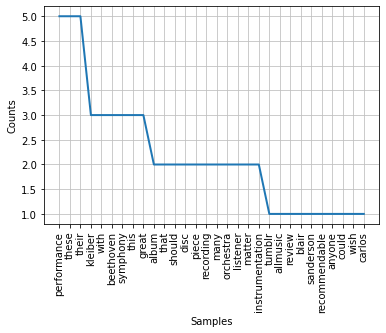

144


In [59]:
print(lemma_classical_0)
lemma_classical_0_freq = nltk.FreqDist(lemma_classical_0)
lemma_classical_0_freq.plot(30, cumulative=False)
vocab_classical_0 = set(lemma_classical_0)
print(len(vocab_classical_0))

['bandcamp', 'ever-roving', 'guitarist', 'james', 'elkington', 'second', 'solo', 'album', 'open', 'with', 'brief', 'acoustic', 'overture—a', 'short', 'melodic', 'theme', 'repeated', 'just', 'time', 'followed', 'volley', 'deftly', 'delicately', 'picked', 'note', 'barely', 'minute', 'long', 'altogether—that', 'could', 'holdover', 'from', '2017', 'debut', 'spare', 'thoughtful', 'wintres', 'woma', 'then', 'interrupted', 'sharp', 'thwack', 'snare', 'drum', 'from', 'spencer', 'tweedy', 'nowhere', 'time', 'abruptly', 'take', 'another', 'direction', 'tempo', 'quickens', 'elkington', 'acoustic', 'joined', 'taut', 'rhythm', 'section', 'even', 'electric', 'guitar', 'tracing', 'loop', 'spiral', 'around', 'vocal', 'there', 'packed', 'into', 'that', 'transition', 'from', 'solo', 'full', 'band', 'set', 'elkington', 'most', 'elaborate', 'arrangement', 'date', 'allowing', 'sound', 'freer', 'looser', 'than', 'ever', 'trying', 'shed', 'expectation', 'folk', 'guitar', 'restrictive', 'genre', 'rooted', 'de

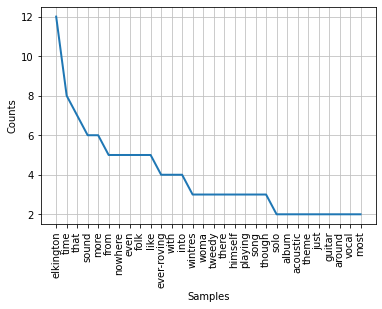

290


In [60]:
print(lemma_folk_0)
lemma_folk_0_freq = nltk.FreqDist(lemma_folk_0)
lemma_folk_0_freq.plot(30, cumulative=False)
vocab_folk_0 = set(lemma_folk_0)
print(len(vocab_folk_0))

In [0]:
vocab_rock_0 = set(lemma_rock_0)
keywords_rock_0 = len(rock_terms.intersection(lemma_rock_0))
keywords_jazz_0 = len(jazz_terms.intersection(lemma_jazz_0))
keywords_rap_0 = len(rap_terms.intersection(lemma_rap_0))
keywords_classical_0 = len(classical_terms.intersection(lemma_classical_0))
keywords_folk_0 = len(folk_terms.intersection(lemma_folk_0))

vocab_rock_1 = set(lemma_rock_1)
keywords_rock_1 = len(rock_terms.intersection(lemma_rock_1))
keywords_jazz_1 = len(jazz_terms.intersection(lemma_jazz_1))
keywords_rap_1 = len(rap_terms.intersection(lemma_rap_1))
keywords_classical_1 = len(classical_terms.intersection(lemma_classical_1))
keywords_folk_1 = len(folk_terms.intersection(lemma_folk_1))

vocab_rock_2 = set(lemma_rock_2)
keywords_rock_2 = len(rock_terms.intersection(lemma_rock_2))
keywords_jazz_2 = len(jazz_terms.intersection(lemma_jazz_2))
keywords_rap_2 = len(rap_terms.intersection(lemma_rap_2))
keywords_classical_2 = len(classical_terms.intersection(lemma_classical_2))
keywords_folk_2 = len(folk_terms.intersection(lemma_folk_2))

vocab_rock_3 = set(lemma_rock_3)
keywords_rock_3 = len(rock_terms.intersection(lemma_rock_3))
keywords_jazz_3 = len(jazz_terms.intersection(lemma_jazz_3))
keywords_rap_3 = len(rap_terms.intersection(lemma_rap_3))
keywords_classical_3 = len(classical_terms.intersection(lemma_classical_3))
keywords_folk_3 = len(folk_terms.intersection(lemma_folk_3))

vocab_rock_4 = set(lemma_rock_4)
keywords_rock_4 = len(rock_terms.intersection(lemma_rock_4))
keywords_jazz_4 = len(jazz_terms.intersection(lemma_jazz_4))
keywords_rap_4 = len(rap_terms.intersection(lemma_rap_4))
keywords_classical_4 = len(classical_terms.intersection(lemma_classical_4))
keywords_folk_4 = len(folk_terms.intersection(lemma_folk_4))

vocab_rock_5 = set(lemma_rock_5)
keywords_rock_5 = len(rock_terms.intersection(lemma_rock_5))
keywords_jazz_5 = len(jazz_terms.intersection(lemma_jazz_5))
keywords_rap_5 = len(rap_terms.intersection(lemma_rap_5))
keywords_classical_5 = len(classical_terms.intersection(lemma_classical_5))
keywords_folk_5 = len(folk_terms.intersection(lemma_folk_5))

vocab_rock_6 = set(lemma_rock_6)
keywords_rock_6 = len(rock_terms.intersection(lemma_rock_6))
keywords_jazz_6 = len(jazz_terms.intersection(lemma_jazz_6))
keywords_rap_6 = len(rap_terms.intersection(lemma_rap_6))
keywords_classical_6 = len(classical_terms.intersection(lemma_classical_6))
keywords_folk_6 = len(folk_terms.intersection(lemma_folk_6))

vocab_rock_7 = set(lemma_rock_7)
keywords_rock_7 = len(rock_terms.intersection(lemma_rock_7))
keywords_jazz_7 = len(jazz_terms.intersection(lemma_jazz_7))
keywords_rap_7 = len(rap_terms.intersection(lemma_rap_7))
keywords_classical_7 = len(classical_terms.intersection(lemma_classical_7))
keywords_folk_7 = len(folk_terms.intersection(lemma_folk_7))

vocab_rock_8 = set(lemma_rock_8)
keywords_rock_8 = len(rock_terms.intersection(lemma_rock_8))
keywords_jazz_8 = len(jazz_terms.intersection(lemma_jazz_8))
keywords_rap_8 = len(rap_terms.intersection(lemma_rap_8))
keywords_classical_8 = len(classical_terms.intersection(lemma_classical_8))
keywords_folk_8 = len(folk_terms.intersection(lemma_folk_8))

vocab_rock_9 = set(lemma_rock_9)
keywords_rock_9 = len(rock_terms.intersection(lemma_rock_9))
keywords_jazz_9 = len(jazz_terms.intersection(lemma_jazz_9))
keywords_rap_9 = len(rap_terms.intersection(lemma_rap_9))
keywords_classical_9 = len(classical_terms.intersection(lemma_classical_9))
keywords_folk_9 = len(folk_terms.intersection(lemma_folk_9))

vocab_jazz_0 = set(lemma_jazz_0)
keywords_rock_0 = len(rock_terms.intersection(lemma_rock_0))
keywords_jazz_0 = len(jazz_terms.intersection(lemma_jazz_0))
keywords_rap_0 = len(rap_terms.intersection(lemma_rap_0))
keywords_classical_0 = len(classical_terms.intersection(lemma_classical_0))
keywords_folk_0 = len(folk_terms.intersection(lemma_folk_0))

vocab_jazz_1 = set(lemma_jazz_1)
keywords_rock_1 = len(rock_terms.intersection(lemma_rock_1))
keywords_jazz_1 = len(jazz_terms.intersection(lemma_jazz_1))
keywords_rap_1 = len(rap_terms.intersection(lemma_rap_1))
keywords_classical_1 = len(classical_terms.intersection(lemma_classical_1))
keywords_folk_1 = len(folk_terms.intersection(lemma_folk_1))

vocab_jazz_2 = set(lemma_jazz_2)
keywords_rock_2 = len(rock_terms.intersection(lemma_rock_2))
keywords_jazz_2 = len(jazz_terms.intersection(lemma_jazz_2))
keywords_rap_2 = len(rap_terms.intersection(lemma_rap_2))
keywords_classical_2 = len(classical_terms.intersection(lemma_classical_2))
keywords_folk_2 = len(folk_terms.intersection(lemma_folk_2))

vocab_jazz_3 = set(lemma_jazz_3)
keywords_rock_3 = len(rock_terms.intersection(lemma_rock_3))
keywords_jazz_3 = len(jazz_terms.intersection(lemma_jazz_3))
keywords_rap_3 = len(rap_terms.intersection(lemma_rap_3))
keywords_classical_3 = len(classical_terms.intersection(lemma_classical_3))
keywords_folk_3 = len(folk_terms.intersection(lemma_folk_3))

vocab_jazz_4 = set(lemma_jazz_4)
keywords_rock_4 = len(rock_terms.intersection(lemma_rock_4))
keywords_jazz_4 = len(jazz_terms.intersection(lemma_jazz_4))
keywords_rap_4 = len(rap_terms.intersection(lemma_rap_4))
keywords_classical_4 = len(classical_terms.intersection(lemma_classical_4))
keywords_folk_4 = len(folk_terms.intersection(lemma_folk_4))

vocab_jazz_5 = set(lemma_jazz_5)
keywords_rock_5 = len(rock_terms.intersection(lemma_rock_5))
keywords_jazz_5 = len(jazz_terms.intersection(lemma_jazz_5))
keywords_rap_5 = len(rap_terms.intersection(lemma_rap_5))
keywords_classical_5 = len(classical_terms.intersection(lemma_classical_5))
keywords_folk_5 = len(folk_terms.intersection(lemma_folk_5))

vocab_jazz_6 = set(lemma_jazz_6)
keywords_rock_6 = len(rock_terms.intersection(lemma_rock_6))
keywords_jazz_6 = len(jazz_terms.intersection(lemma_jazz_6))
keywords_rap_6 = len(rap_terms.intersection(lemma_rap_6))
keywords_classical_6 = len(classical_terms.intersection(lemma_classical_6))
keywords_folk_6 = len(folk_terms.intersection(lemma_folk_6))

vocab_jazz_7 = set(lemma_jazz_7)
keywords_rock_7 = len(rock_terms.intersection(lemma_rock_7))
keywords_jazz_7 = len(jazz_terms.intersection(lemma_jazz_7))
keywords_rap_7 = len(rap_terms.intersection(lemma_rap_7))
keywords_classical_7 = len(classical_terms.intersection(lemma_classical_7))
keywords_folk_7 = len(folk_terms.intersection(lemma_folk_7))

vocab_jazz_8 = set(lemma_jazz_8)
keywords_rock_8 = len(rock_terms.intersection(lemma_rock_8))
keywords_jazz_8 = len(jazz_terms.intersection(lemma_jazz_8))
keywords_rap_8 = len(rap_terms.intersection(lemma_rap_8))
keywords_classical_8 = len(classical_terms.intersection(lemma_classical_8))
keywords_folk_8 = len(folk_terms.intersection(lemma_folk_8))

vocab_jazz_9 = set(lemma_jazz_9)
keywords_rock_9 = len(rock_terms.intersection(lemma_rock_9))
keywords_jazz_9 = len(jazz_terms.intersection(lemma_jazz_9))
keywords_rap_9 = len(rap_terms.intersection(lemma_rap_9))
keywords_classical_9 = len(classical_terms.intersection(lemma_classical_9))
keywords_folk_9 = len(folk_terms.intersection(lemma_folk_9))

vocab_rap_0 = set(lemma_rap_0)
keywords_rock_0 = len(rock_terms.intersection(lemma_rock_0))
keywords_jazz_0 = len(jazz_terms.intersection(lemma_jazz_0))
keywords_rap_0 = len(rap_terms.intersection(lemma_rap_0))
keywords_classical_0 = len(classical_terms.intersection(lemma_classical_0))
keywords_folk_0 = len(folk_terms.intersection(lemma_folk_0))

vocab_rap_1 = set(lemma_rap_1)
keywords_rock_1 = len(rock_terms.intersection(lemma_rock_1))
keywords_jazz_1 = len(jazz_terms.intersection(lemma_jazz_1))
keywords_rap_1 = len(rap_terms.intersection(lemma_rap_1))
keywords_classical_1 = len(classical_terms.intersection(lemma_classical_1))
keywords_folk_1 = len(folk_terms.intersection(lemma_folk_1))

vocab_rap_2 = set(lemma_rap_2)
keywords_rock_2 = len(rock_terms.intersection(lemma_rock_2))
keywords_jazz_2 = len(jazz_terms.intersection(lemma_jazz_2))
keywords_rap_2 = len(rap_terms.intersection(lemma_rap_2))
keywords_classical_2 = len(classical_terms.intersection(lemma_classical_2))
keywords_folk_2 = len(folk_terms.intersection(lemma_folk_2))

vocab_rap_3 = set(lemma_rap_3)
keywords_rock_3 = len(rock_terms.intersection(lemma_rock_3))
keywords_jazz_3 = len(jazz_terms.intersection(lemma_jazz_3))
keywords_rap_3 = len(rap_terms.intersection(lemma_rap_3))
keywords_classical_3 = len(classical_terms.intersection(lemma_classical_3))
keywords_folk_3 = len(folk_terms.intersection(lemma_folk_3))

vocab_rap_4 = set(lemma_rap_4)
keywords_rock_4 = len(rock_terms.intersection(lemma_rock_4))
keywords_jazz_4 = len(jazz_terms.intersection(lemma_jazz_4))
keywords_rap_4 = len(rap_terms.intersection(lemma_rap_4))
keywords_classical_4 = len(classical_terms.intersection(lemma_classical_4))
keywords_folk_4 = len(folk_terms.intersection(lemma_folk_4))

vocab_rap_5 = set(lemma_rap_5)
keywords_rock_5 = len(rock_terms.intersection(lemma_rock_5))
keywords_jazz_5 = len(jazz_terms.intersection(lemma_jazz_5))
keywords_rap_5 = len(rap_terms.intersection(lemma_rap_5))
keywords_classical_5 = len(classical_terms.intersection(lemma_classical_5))
keywords_folk_5 = len(folk_terms.intersection(lemma_folk_5))

vocab_rap_6 = set(lemma_rap_6)
keywords_rock_6 = len(rock_terms.intersection(lemma_rock_6))
keywords_jazz_6 = len(jazz_terms.intersection(lemma_jazz_6))
keywords_rap_6 = len(rap_terms.intersection(lemma_rap_6))
keywords_classical_6 = len(classical_terms.intersection(lemma_classical_6))
keywords_folk_6 = len(folk_terms.intersection(lemma_folk_6))

vocab_rap_7 = set(lemma_rap_7)
keywords_rock_7 = len(rock_terms.intersection(lemma_rock_7))
keywords_jazz_7 = len(jazz_terms.intersection(lemma_jazz_7))
keywords_rap_7 = len(rap_terms.intersection(lemma_rap_7))
keywords_classical_7 = len(classical_terms.intersection(lemma_classical_7))
keywords_folk_7 = len(folk_terms.intersection(lemma_folk_7))

vocab_rap_8 = set(lemma_rap_8)
keywords_rock_8 = len(rock_terms.intersection(lemma_rock_8))
keywords_jazz_8 = len(jazz_terms.intersection(lemma_jazz_8))
keywords_rap_8 = len(rap_terms.intersection(lemma_rap_8))
keywords_classical_8 = len(classical_terms.intersection(lemma_classical_8))
keywords_folk_8 = len(folk_terms.intersection(lemma_folk_8))

vocab_rap_9 = set(lemma_rap_9)
keywords_rock_9 = len(rock_terms.intersection(lemma_rock_9))
keywords_jazz_9 = len(jazz_terms.intersection(lemma_jazz_9))
keywords_rap_9 = len(rap_terms.intersection(lemma_rap_9))
keywords_classical_9 = len(classical_terms.intersection(lemma_classical_9))
keywords_folk_9 = len(folk_terms.intersection(lemma_folk_9))

vocab_classical_0 = set(lemma_classical_0)
keywords_rock_0 = len(rock_terms.intersection(lemma_rock_0))
keywords_jazz_0 = len(jazz_terms.intersection(lemma_jazz_0))
keywords_rap_0 = len(rap_terms.intersection(lemma_rap_0))
keywords_classical_0 = len(classical_terms.intersection(lemma_classical_0))
keywords_folk_0 = len(folk_terms.intersection(lemma_folk_0))

vocab_classical_1 = set(lemma_classical_1)
keywords_rock_1 = len(rock_terms.intersection(lemma_rock_1))
keywords_jazz_1 = len(jazz_terms.intersection(lemma_jazz_1))
keywords_rap_1 = len(rap_terms.intersection(lemma_rap_1))
keywords_classical_1 = len(classical_terms.intersection(lemma_classical_1))
keywords_folk_1 = len(folk_terms.intersection(lemma_folk_1))

vocab_classical_2 = set(lemma_classical_2)
keywords_rock_2 = len(rock_terms.intersection(lemma_rock_2))
keywords_jazz_2 = len(jazz_terms.intersection(lemma_jazz_2))
keywords_rap_2 = len(rap_terms.intersection(lemma_rap_2))
keywords_classical_2 = len(classical_terms.intersection(lemma_classical_2))
keywords_folk_2 = len(folk_terms.intersection(lemma_folk_2))

vocab_classical_3 = set(lemma_classical_3)
keywords_rock_3 = len(rock_terms.intersection(lemma_rock_3))
keywords_jazz_3 = len(jazz_terms.intersection(lemma_jazz_3))
keywords_rap_3 = len(rap_terms.intersection(lemma_rap_3))
keywords_classical_3 = len(classical_terms.intersection(lemma_classical_3))
keywords_folk_3 = len(folk_terms.intersection(lemma_folk_3))

vocab_classical_4 = set(lemma_classical_4)
keywords_rock_4 = len(rock_terms.intersection(lemma_rock_4))
keywords_jazz_4 = len(jazz_terms.intersection(lemma_jazz_4))
keywords_rap_4 = len(rap_terms.intersection(lemma_rap_4))
keywords_classical_4 = len(classical_terms.intersection(lemma_classical_4))
keywords_folk_4 = len(folk_terms.intersection(lemma_folk_4))

vocab_classical_5 = set(lemma_classical_5)
keywords_rock_5 = len(rock_terms.intersection(lemma_rock_5))
keywords_jazz_5 = len(jazz_terms.intersection(lemma_jazz_5))
keywords_rap_5 = len(rap_terms.intersection(lemma_rap_5))
keywords_classical_5 = len(classical_terms.intersection(lemma_classical_5))
keywords_folk_5 = len(folk_terms.intersection(lemma_folk_5))

vocab_classical_6 = set(lemma_classical_6)
keywords_rock_6 = len(rock_terms.intersection(lemma_rock_6))
keywords_jazz_6 = len(jazz_terms.intersection(lemma_jazz_6))
keywords_rap_6 = len(rap_terms.intersection(lemma_rap_6))
keywords_classical_6 = len(classical_terms.intersection(lemma_classical_6))
keywords_folk_6 = len(folk_terms.intersection(lemma_folk_6))

vocab_classical_7 = set(lemma_classical_7)
keywords_rock_7 = len(rock_terms.intersection(lemma_rock_7))
keywords_jazz_7 = len(jazz_terms.intersection(lemma_jazz_7))
keywords_rap_7 = len(rap_terms.intersection(lemma_rap_7))
keywords_classical_7 = len(classical_terms.intersection(lemma_classical_7))
keywords_folk_7 = len(folk_terms.intersection(lemma_folk_7))

vocab_classical_8 = set(lemma_classical_8)
keywords_rock_8 = len(rock_terms.intersection(lemma_rock_8))
keywords_jazz_8 = len(jazz_terms.intersection(lemma_jazz_8))
keywords_rap_8 = len(rap_terms.intersection(lemma_rap_8))
keywords_classical_8 = len(classical_terms.intersection(lemma_classical_8))
keywords_folk_8 = len(folk_terms.intersection(lemma_folk_8))

vocab_classical_9 = set(lemma_classical_9)
keywords_rock_9 = len(rock_terms.intersection(lemma_rock_9))
keywords_jazz_9 = len(jazz_terms.intersection(lemma_jazz_9))
keywords_rap_9 = len(rap_terms.intersection(lemma_rap_9))
keywords_classical_9 = len(classical_terms.intersection(lemma_classical_9))
keywords_folk_9 = len(folk_terms.intersection(lemma_folk_9))

vocab_folk_0 = set(lemma_folk_0)
keywords_rock_0 = len(rock_terms.intersection(lemma_rock_0))
keywords_jazz_0 = len(jazz_terms.intersection(lemma_jazz_0))
keywords_rap_0 = len(rap_terms.intersection(lemma_rap_0))
keywords_classical_0 = len(classical_terms.intersection(lemma_classical_0))
keywords_folk_0 = len(folk_terms.intersection(lemma_folk_0))

vocab_folk_1 = set(lemma_folk_1)
keywords_rock_1 = len(rock_terms.intersection(lemma_rock_1))
keywords_jazz_1 = len(jazz_terms.intersection(lemma_jazz_1))
keywords_rap_1 = len(rap_terms.intersection(lemma_rap_1))
keywords_classical_1 = len(classical_terms.intersection(lemma_classical_1))
keywords_folk_1 = len(folk_terms.intersection(lemma_folk_1))

vocab_folk_2 = set(lemma_folk_2)
keywords_rock_2 = len(rock_terms.intersection(lemma_rock_2))
keywords_jazz_2 = len(jazz_terms.intersection(lemma_jazz_2))
keywords_rap_2 = len(rap_terms.intersection(lemma_rap_2))
keywords_classical_2 = len(classical_terms.intersection(lemma_classical_2))
keywords_folk_2 = len(folk_terms.intersection(lemma_folk_2))

vocab_folk_3 = set(lemma_folk_3)
keywords_rock_3 = len(rock_terms.intersection(lemma_rock_3))
keywords_jazz_3 = len(jazz_terms.intersection(lemma_jazz_3))
keywords_rap_3 = len(rap_terms.intersection(lemma_rap_3))
keywords_classical_3 = len(classical_terms.intersection(lemma_classical_3))
keywords_folk_3 = len(folk_terms.intersection(lemma_folk_3))

vocab_folk_4 = set(lemma_folk_4)
keywords_rock_4 = len(rock_terms.intersection(lemma_rock_4))
keywords_jazz_4 = len(jazz_terms.intersection(lemma_jazz_4))
keywords_rap_4 = len(rap_terms.intersection(lemma_rap_4))
keywords_classical_4 = len(classical_terms.intersection(lemma_classical_4))
keywords_folk_4 = len(folk_terms.intersection(lemma_folk_4))

vocab_folk_5 = set(lemma_folk_5)
keywords_rock_5 = len(rock_terms.intersection(lemma_rock_5))
keywords_jazz_5 = len(jazz_terms.intersection(lemma_jazz_5))
keywords_rap_5 = len(rap_terms.intersection(lemma_rap_5))
keywords_classical_5 = len(classical_terms.intersection(lemma_classical_5))
keywords_folk_5 = len(folk_terms.intersection(lemma_folk_5))

vocab_folk_6 = set(lemma_folk_6)
keywords_rock_6 = len(rock_terms.intersection(lemma_rock_6))
keywords_jazz_6 = len(jazz_terms.intersection(lemma_jazz_6))
keywords_rap_6 = len(rap_terms.intersection(lemma_rap_6))
keywords_classical_6 = len(classical_terms.intersection(lemma_classical_6))
keywords_folk_6 = len(folk_terms.intersection(lemma_folk_6))

vocab_folk_7 = set(lemma_folk_7)
keywords_rock_7 = len(rock_terms.intersection(lemma_rock_7))
keywords_jazz_7 = len(jazz_terms.intersection(lemma_jazz_7))
keywords_rap_7 = len(rap_terms.intersection(lemma_rap_7))
keywords_classical_7 = len(classical_terms.intersection(lemma_classical_7))
keywords_folk_7 = len(folk_terms.intersection(lemma_folk_7))

vocab_folk_8 = set(lemma_folk_8)
keywords_rock_8 = len(rock_terms.intersection(lemma_rock_8))
keywords_jazz_8 = len(jazz_terms.intersection(lemma_jazz_8))
keywords_rap_8 = len(rap_terms.intersection(lemma_rap_8))
keywords_classical_8 = len(classical_terms.intersection(lemma_classical_8))
keywords_folk_8 = len(folk_terms.intersection(lemma_folk_8))

vocab_folk_9 = set(lemma_folk_9)
keywords_rock_9 = len(rock_terms.intersection(lemma_rock_9))
keywords_jazz_9 = len(jazz_terms.intersection(lemma_jazz_9))
keywords_rap_9 = len(rap_terms.intersection(lemma_rap_9))
keywords_classical_9 = len(classical_terms.intersection(lemma_classical_9))
keywords_folk_9 = len(folk_terms.intersection(lemma_folk_9))


In [0]:
lemma_rock_0_freq = nltk.FreqDist(lemma_rock_0)
lemma_rock_1_freq = nltk.FreqDist(lemma_rock_1)
lemma_rock_2_freq = nltk.FreqDist(lemma_rock_2)
lemma_rock_3_freq = nltk.FreqDist(lemma_rock_3)
lemma_rock_4_freq = nltk.FreqDist(lemma_rock_4)
lemma_rock_5_freq = nltk.FreqDist(lemma_rock_5)
lemma_rock_6_freq = nltk.FreqDist(lemma_rock_6)
lemma_rock_7_freq = nltk.FreqDist(lemma_rock_7)
lemma_rock_8_freq = nltk.FreqDist(lemma_rock_8)
lemma_rock_9_freq = nltk.FreqDist(lemma_rock_9)

lemma_jazz_0_freq = nltk.FreqDist(lemma_jazz_0)
lemma_jazz_1_freq = nltk.FreqDist(lemma_jazz_1)
lemma_jazz_2_freq = nltk.FreqDist(lemma_jazz_2)
lemma_jazz_3_freq = nltk.FreqDist(lemma_jazz_3)
lemma_jazz_4_freq = nltk.FreqDist(lemma_jazz_4)
lemma_jazz_5_freq = nltk.FreqDist(lemma_jazz_5)
lemma_jazz_6_freq = nltk.FreqDist(lemma_jazz_6)
lemma_jazz_7_freq = nltk.FreqDist(lemma_jazz_7)
lemma_jazz_8_freq = nltk.FreqDist(lemma_jazz_8)
lemma_jazz_9_freq = nltk.FreqDist(lemma_jazz_9)

lemma_rap_0_freq = nltk.FreqDist(lemma_rap_0)
lemma_rap_1_freq = nltk.FreqDist(lemma_rap_1)
lemma_rap_2_freq = nltk.FreqDist(lemma_rap_2)
lemma_rap_3_freq = nltk.FreqDist(lemma_rap_3)
lemma_rap_4_freq = nltk.FreqDist(lemma_rap_4)
lemma_rap_5_freq = nltk.FreqDist(lemma_rap_5)
lemma_rap_6_freq = nltk.FreqDist(lemma_rap_6)
lemma_rap_7_freq = nltk.FreqDist(lemma_rap_7)
lemma_rap_8_freq = nltk.FreqDist(lemma_rap_8)
lemma_rap_9_freq = nltk.FreqDist(lemma_rap_9)

lemma_classical_0_freq = nltk.FreqDist(lemma_classical_0)
lemma_classical_1_freq = nltk.FreqDist(lemma_classical_1)
lemma_classical_2_freq = nltk.FreqDist(lemma_classical_2)
lemma_classical_3_freq = nltk.FreqDist(lemma_classical_3)
lemma_classical_4_freq = nltk.FreqDist(lemma_classical_4)
lemma_classical_5_freq = nltk.FreqDist(lemma_classical_5)
lemma_classical_6_freq = nltk.FreqDist(lemma_classical_6)
lemma_classical_7_freq = nltk.FreqDist(lemma_classical_7)
lemma_classical_8_freq = nltk.FreqDist(lemma_classical_8)
lemma_classical_9_freq = nltk.FreqDist(lemma_classical_9)

lemma_folk_0_freq = nltk.FreqDist(lemma_folk_0)
lemma_folk_1_freq = nltk.FreqDist(lemma_folk_1)
lemma_folk_2_freq = nltk.FreqDist(lemma_folk_2)
lemma_folk_3_freq = nltk.FreqDist(lemma_folk_3)
lemma_folk_4_freq = nltk.FreqDist(lemma_folk_4)
lemma_folk_5_freq = nltk.FreqDist(lemma_folk_5)
lemma_folk_6_freq = nltk.FreqDist(lemma_folk_6)
lemma_folk_7_freq = nltk.FreqDist(lemma_folk_7)
lemma_folk_8_freq = nltk.FreqDist(lemma_folk_8)
lemma_folk_9_freq = nltk.FreqDist(lemma_folk_9)


In [0]:
rock_0_ser = pd.Series([vocab_rock_0, len(vocab_rock_0), lemma_rock_0_freq.max(), len(vocab_rock_0)/len(lemma_rock_0), len(lemma_rock_0_freq.hapaxes()), keywords_rock_0, keywords_jazz_0, keywords_rap_0, keywords_classical_0, keywords_folk_0, 'rock'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rock_1_ser = pd.Series([vocab_rock_1, len(vocab_rock_1), lemma_rock_1_freq.max(), len(vocab_rock_1)/len(lemma_rock_1), len(lemma_rock_1_freq.hapaxes()), keywords_rock_1, keywords_jazz_1, keywords_rap_1, keywords_classical_1, keywords_folk_1, 'rock'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rock_2_ser = pd.Series([vocab_rock_2, len(vocab_rock_2), lemma_rock_2_freq.max(), len(vocab_rock_2)/len(lemma_rock_2), len(lemma_rock_2_freq.hapaxes()), keywords_rock_2, keywords_jazz_2, keywords_rap_2, keywords_classical_2, keywords_folk_2, 'rock'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rock_3_ser = pd.Series([vocab_rock_3, len(vocab_rock_3), lemma_rock_3_freq.max(), len(vocab_rock_3)/len(lemma_rock_3), len(lemma_rock_3_freq.hapaxes()), keywords_rock_3, keywords_jazz_3, keywords_rap_3, keywords_classical_3, keywords_folk_3, 'rock'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rock_4_ser = pd.Series([vocab_rock_4, len(vocab_rock_4), lemma_rock_4_freq.max(), len(vocab_rock_4)/len(lemma_rock_4), len(lemma_rock_4_freq.hapaxes()), keywords_rock_4, keywords_jazz_4, keywords_rap_4, keywords_classical_4, keywords_folk_4, 'rock'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rock_5_ser = pd.Series([vocab_rock_5, len(vocab_rock_5), lemma_rock_5_freq.max(), len(vocab_rock_5)/len(lemma_rock_5), len(lemma_rock_5_freq.hapaxes()), keywords_rock_5, keywords_jazz_5, keywords_rap_5, keywords_classical_5, keywords_folk_5, 'rock'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rock_6_ser = pd.Series([vocab_rock_6, len(vocab_rock_6), lemma_rock_6_freq.max(), len(vocab_rock_6)/len(lemma_rock_6), len(lemma_rock_6_freq.hapaxes()), keywords_rock_6, keywords_jazz_6, keywords_rap_6, keywords_classical_6, keywords_folk_6, 'rock'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rock_7_ser = pd.Series([vocab_rock_7, len(vocab_rock_7), lemma_rock_7_freq.max(), len(vocab_rock_7)/len(lemma_rock_7), len(lemma_rock_7_freq.hapaxes()), keywords_rock_7, keywords_jazz_7, keywords_rap_7, keywords_classical_7, keywords_folk_7, 'rock'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rock_8_ser = pd.Series([vocab_rock_8, len(vocab_rock_8), lemma_rock_8_freq.max(), len(vocab_rock_8)/len(lemma_rock_8), len(lemma_rock_8_freq.hapaxes()), keywords_rock_8, keywords_jazz_8, keywords_rap_8, keywords_classical_8, keywords_folk_8, 'rock'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rock_9_ser = pd.Series([vocab_rock_9, len(vocab_rock_9), lemma_rock_9_freq.max(), len(vocab_rock_9)/len(lemma_rock_9), len(lemma_rock_9_freq.hapaxes()), keywords_rock_9, keywords_jazz_9, keywords_rap_9, keywords_classical_9, keywords_folk_9, 'rock'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])


In [0]:
jazz_0_ser = pd.Series([vocab_jazz_0, len(vocab_jazz_0), lemma_jazz_0_freq.max(), len(vocab_jazz_0)/len(lemma_jazz_0), len(lemma_jazz_0_freq.hapaxes()), keywords_rock_0, keywords_jazz_0, keywords_rap_0, keywords_classical_0, keywords_folk_0, 'jazz'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
jazz_1_ser = pd.Series([vocab_jazz_1, len(vocab_jazz_1), lemma_jazz_1_freq.max(), len(vocab_jazz_1)/len(lemma_jazz_1), len(lemma_jazz_1_freq.hapaxes()), keywords_rock_1, keywords_jazz_1, keywords_rap_1, keywords_classical_1, keywords_folk_1, 'jazz'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
jazz_2_ser = pd.Series([vocab_jazz_2, len(vocab_jazz_2), lemma_jazz_2_freq.max(), len(vocab_jazz_2)/len(lemma_jazz_2), len(lemma_jazz_2_freq.hapaxes()), keywords_rock_2, keywords_jazz_2, keywords_rap_2, keywords_classical_2, keywords_folk_2, 'jazz'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
jazz_3_ser = pd.Series([vocab_jazz_3, len(vocab_jazz_3), lemma_jazz_3_freq.max(), len(vocab_jazz_3)/len(lemma_jazz_3), len(lemma_jazz_3_freq.hapaxes()), keywords_rock_3, keywords_jazz_3, keywords_rap_3, keywords_classical_3, keywords_folk_3, 'jazz'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
jazz_4_ser = pd.Series([vocab_jazz_4, len(vocab_jazz_4), lemma_jazz_4_freq.max(), len(vocab_jazz_4)/len(lemma_jazz_4), len(lemma_jazz_4_freq.hapaxes()), keywords_rock_4, keywords_jazz_4, keywords_rap_4, keywords_classical_4, keywords_folk_4, 'jazz'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
jazz_5_ser = pd.Series([vocab_jazz_5, len(vocab_jazz_5), lemma_jazz_5_freq.max(), len(vocab_jazz_5)/len(lemma_jazz_5), len(lemma_jazz_5_freq.hapaxes()), keywords_rock_5, keywords_jazz_5, keywords_rap_5, keywords_classical_5, keywords_folk_5, 'jazz'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
jazz_6_ser = pd.Series([vocab_jazz_6, len(vocab_jazz_6), lemma_jazz_6_freq.max(), len(vocab_jazz_6)/len(lemma_jazz_6), len(lemma_jazz_6_freq.hapaxes()), keywords_rock_6, keywords_jazz_6, keywords_rap_6, keywords_classical_6, keywords_folk_6, 'jazz'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
jazz_7_ser = pd.Series([vocab_jazz_7, len(vocab_jazz_7), lemma_jazz_7_freq.max(), len(vocab_jazz_7)/len(lemma_jazz_7), len(lemma_jazz_7_freq.hapaxes()), keywords_rock_7, keywords_jazz_7, keywords_rap_7, keywords_classical_7, keywords_folk_7, 'jazz'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
jazz_8_ser = pd.Series([vocab_jazz_8, len(vocab_jazz_8), lemma_jazz_8_freq.max(), len(vocab_jazz_8)/len(lemma_jazz_8), len(lemma_jazz_8_freq.hapaxes()), keywords_rock_8, keywords_jazz_8, keywords_rap_8, keywords_classical_8, keywords_folk_8, 'jazz'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
jazz_9_ser = pd.Series([vocab_jazz_9, len(vocab_jazz_9), lemma_jazz_9_freq.max(), len(vocab_jazz_9)/len(lemma_jazz_9), len(lemma_jazz_9_freq.hapaxes()), keywords_rock_9, keywords_jazz_9, keywords_rap_9, keywords_classical_9, keywords_folk_9, 'jazz'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])


In [0]:
rap_0_ser = pd.Series([vocab_rap_0, len(vocab_rap_0), lemma_rap_0_freq.max(), len(vocab_rap_0)/len(lemma_rap_0), len(lemma_rap_0_freq.hapaxes()), keywords_rock_0, keywords_jazz_0, keywords_rap_0, keywords_classical_0, keywords_folk_0, 'rap'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rap_1_ser = pd.Series([vocab_rap_1, len(vocab_rap_1), lemma_rap_1_freq.max(), len(vocab_rap_1)/len(lemma_rap_1), len(lemma_rap_1_freq.hapaxes()), keywords_rock_1, keywords_jazz_1, keywords_rap_1, keywords_classical_1, keywords_folk_1, 'rap'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rap_2_ser = pd.Series([vocab_rap_2, len(vocab_rap_2), lemma_rap_2_freq.max(), len(vocab_rap_2)/len(lemma_rap_2), len(lemma_rap_2_freq.hapaxes()), keywords_rock_2, keywords_jazz_2, keywords_rap_2, keywords_classical_2, keywords_folk_2, 'rap'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rap_3_ser = pd.Series([vocab_rap_3, len(vocab_rap_3), lemma_rap_3_freq.max(), len(vocab_rap_3)/len(lemma_rap_3), len(lemma_rap_3_freq.hapaxes()), keywords_rock_3, keywords_jazz_3, keywords_rap_3, keywords_classical_3, keywords_folk_3, 'rap'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rap_4_ser = pd.Series([vocab_rap_4, len(vocab_rap_4), lemma_rap_4_freq.max(), len(vocab_rap_4)/len(lemma_rap_4), len(lemma_rap_4_freq.hapaxes()), keywords_rock_4, keywords_jazz_4, keywords_rap_4, keywords_classical_4, keywords_folk_4, 'rap'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rap_5_ser = pd.Series([vocab_rap_5, len(vocab_rap_5), lemma_rap_5_freq.max(), len(vocab_rap_5)/len(lemma_rap_5), len(lemma_rap_5_freq.hapaxes()), keywords_rock_5, keywords_jazz_5, keywords_rap_5, keywords_classical_5, keywords_folk_5, 'rap'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rap_6_ser = pd.Series([vocab_rap_6, len(vocab_rap_6), lemma_rap_6_freq.max(), len(vocab_rap_6)/len(lemma_rap_6), len(lemma_rap_6_freq.hapaxes()), keywords_rock_6, keywords_jazz_6, keywords_rap_6, keywords_classical_6, keywords_folk_6, 'rap'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rap_7_ser = pd.Series([vocab_rap_7, len(vocab_rap_7), lemma_rap_7_freq.max(), len(vocab_rap_7)/len(lemma_rap_7), len(lemma_rap_7_freq.hapaxes()), keywords_rock_7, keywords_jazz_7, keywords_rap_7, keywords_classical_7, keywords_folk_7, 'rap'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rap_8_ser = pd.Series([vocab_rap_8, len(vocab_rap_8), lemma_rap_8_freq.max(), len(vocab_rap_8)/len(lemma_rap_8), len(lemma_rap_8_freq.hapaxes()), keywords_rock_8, keywords_jazz_8, keywords_rap_8, keywords_classical_8, keywords_folk_8, 'rap'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
rap_9_ser = pd.Series([vocab_rap_9, len(vocab_rap_9), lemma_rap_9_freq.max(), len(vocab_rap_9)/len(lemma_rap_9), len(lemma_rap_9_freq.hapaxes()), keywords_rock_9, keywords_jazz_9, keywords_rap_9, keywords_classical_9, keywords_folk_9, 'rap'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])


In [0]:
classical_0_ser = pd.Series([vocab_classical_0, len(vocab_classical_0), lemma_classical_0_freq.max(), len(vocab_classical_0)/len(lemma_classical_0), len(lemma_classical_0_freq.hapaxes()), keywords_rock_0, keywords_jazz_0, keywords_rap_0, keywords_classical_0, keywords_folk_0, 'classical'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
classical_1_ser = pd.Series([vocab_classical_1, len(vocab_classical_1), lemma_classical_1_freq.max(), len(vocab_classical_1)/len(lemma_classical_1), len(lemma_classical_1_freq.hapaxes()), keywords_rock_1, keywords_jazz_1, keywords_rap_1, keywords_classical_1, keywords_folk_1, 'classical'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
classical_2_ser = pd.Series([vocab_classical_2, len(vocab_classical_2), lemma_classical_2_freq.max(), len(vocab_classical_2)/len(lemma_classical_2), len(lemma_classical_2_freq.hapaxes()), keywords_rock_2, keywords_jazz_2, keywords_rap_2, keywords_classical_2, keywords_folk_2, 'classical'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
classical_3_ser = pd.Series([vocab_classical_3, len(vocab_classical_3), lemma_classical_3_freq.max(), len(vocab_classical_3)/len(lemma_classical_3), len(lemma_classical_3_freq.hapaxes()), keywords_rock_3, keywords_jazz_3, keywords_rap_3, keywords_classical_3, keywords_folk_3, 'classical'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
classical_4_ser = pd.Series([vocab_classical_4, len(vocab_classical_4), lemma_classical_4_freq.max(), len(vocab_classical_4)/len(lemma_classical_4), len(lemma_classical_4_freq.hapaxes()), keywords_rock_4, keywords_jazz_4, keywords_rap_4, keywords_classical_4, keywords_folk_4, 'classical'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
classical_5_ser = pd.Series([vocab_classical_5, len(vocab_classical_5), lemma_classical_5_freq.max(), len(vocab_classical_5)/len(lemma_classical_5), len(lemma_classical_5_freq.hapaxes()), keywords_rock_5, keywords_jazz_5, keywords_rap_5, keywords_classical_5, keywords_folk_5, 'classical'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
classical_6_ser = pd.Series([vocab_classical_6, len(vocab_classical_6), lemma_classical_6_freq.max(), len(vocab_classical_6)/len(lemma_classical_6), len(lemma_classical_6_freq.hapaxes()), keywords_rock_6, keywords_jazz_6, keywords_rap_6, keywords_classical_6, keywords_folk_6, 'classical'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
classical_7_ser = pd.Series([vocab_classical_7, len(vocab_classical_7), lemma_classical_7_freq.max(), len(vocab_classical_7)/len(lemma_classical_7), len(lemma_classical_7_freq.hapaxes()), keywords_rock_7, keywords_jazz_7, keywords_rap_7, keywords_classical_7, keywords_folk_7, 'classical'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
classical_8_ser = pd.Series([vocab_classical_8, len(vocab_classical_8), lemma_classical_8_freq.max(), len(vocab_classical_8)/len(lemma_classical_8), len(lemma_classical_8_freq.hapaxes()), keywords_rock_8, keywords_jazz_8, keywords_rap_8, keywords_classical_8, keywords_folk_8, 'classical'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
classical_9_ser = pd.Series([vocab_classical_9, len(vocab_classical_9), lemma_classical_9_freq.max(), len(vocab_classical_9)/len(lemma_classical_9), len(lemma_classical_9_freq.hapaxes()), keywords_rock_9, keywords_jazz_9, keywords_rap_9, keywords_classical_9, keywords_folk_9, 'classical'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])


In [0]:
folk_0_ser = pd.Series([vocab_folk_0, len(vocab_folk_0), lemma_folk_0_freq.max(), len(vocab_folk_0)/len(lemma_folk_0), len(lemma_folk_0_freq.hapaxes()), keywords_rock_0, keywords_jazz_0, keywords_rap_0, keywords_classical_0, keywords_folk_0, 'folk'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
folk_1_ser = pd.Series([vocab_folk_1, len(vocab_folk_1), lemma_folk_1_freq.max(), len(vocab_folk_1)/len(lemma_folk_1), len(lemma_folk_1_freq.hapaxes()), keywords_rock_1, keywords_jazz_1, keywords_rap_1, keywords_classical_1, keywords_folk_1, 'folk'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
folk_2_ser = pd.Series([vocab_folk_2, len(vocab_folk_2), lemma_folk_2_freq.max(), len(vocab_folk_2)/len(lemma_folk_2), len(lemma_folk_2_freq.hapaxes()), keywords_rock_2, keywords_jazz_2, keywords_rap_2, keywords_classical_2, keywords_folk_2, 'folk'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
folk_3_ser = pd.Series([vocab_folk_3, len(vocab_folk_3), lemma_folk_3_freq.max(), len(vocab_folk_3)/len(lemma_folk_3), len(lemma_folk_3_freq.hapaxes()), keywords_rock_3, keywords_jazz_3, keywords_rap_3, keywords_classical_3, keywords_folk_3, 'folk'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
folk_4_ser = pd.Series([vocab_folk_4, len(vocab_folk_4), lemma_folk_4_freq.max(), len(vocab_folk_4)/len(lemma_folk_4), len(lemma_folk_4_freq.hapaxes()), keywords_rock_4, keywords_jazz_4, keywords_rap_4, keywords_classical_4, keywords_folk_4, 'folk'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
folk_5_ser = pd.Series([vocab_folk_5, len(vocab_folk_5), lemma_folk_5_freq.max(), len(vocab_folk_5)/len(lemma_folk_5), len(lemma_folk_5_freq.hapaxes()), keywords_rock_5, keywords_jazz_5, keywords_rap_5, keywords_classical_5, keywords_folk_5, 'folk'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
folk_6_ser = pd.Series([vocab_folk_6, len(vocab_folk_6), lemma_folk_6_freq.max(), len(vocab_folk_6)/len(lemma_folk_6), len(lemma_folk_6_freq.hapaxes()), keywords_rock_6, keywords_jazz_6, keywords_rap_6, keywords_classical_6, keywords_folk_6, 'folk'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
folk_7_ser = pd.Series([vocab_folk_7, len(vocab_folk_7), lemma_folk_7_freq.max(), len(vocab_folk_7)/len(lemma_folk_7), len(lemma_folk_7_freq.hapaxes()), keywords_rock_7, keywords_jazz_7, keywords_rap_7, keywords_classical_7, keywords_folk_7, 'folk'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
folk_8_ser = pd.Series([vocab_folk_8, len(vocab_folk_8), lemma_folk_8_freq.max(), len(vocab_folk_8)/len(lemma_folk_8), len(lemma_folk_8_freq.hapaxes()), keywords_rock_8, keywords_jazz_8, keywords_rap_8, keywords_classical_8, keywords_folk_8, 'folk'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])
folk_9_ser = pd.Series([vocab_folk_9, len(vocab_folk_9), lemma_folk_9_freq.max(), len(vocab_folk_9)/len(lemma_folk_9), len(lemma_folk_9_freq.hapaxes()), keywords_rock_9, keywords_jazz_9, keywords_rap_9, keywords_classical_9, keywords_folk_9, 'folk'], index=['vocab', 'vocab_size', 'most_common_word', 'lexical_diversity', 'hapaxes', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords', 'genre'])


In [68]:
rock_df = pd.DataFrame([rock_0_ser, rock_1_ser, rock_2_ser, rock_3_ser, rock_4_ser, rock_5_ser, rock_6_ser, rock_7_ser, rock_8_ser, rock_9_ser])
jazz_df = pd.DataFrame([jazz_0_ser, jazz_1_ser, jazz_2_ser, jazz_3_ser, jazz_4_ser, jazz_5_ser, jazz_6_ser, jazz_7_ser, jazz_8_ser, jazz_9_ser])
rap_df = pd.DataFrame([rap_0_ser, rap_1_ser, rap_2_ser, rap_3_ser, rap_4_ser, rap_5_ser, rap_6_ser, rap_7_ser, rap_8_ser, rap_9_ser])
classical_df = pd.DataFrame([classical_0_ser, classical_1_ser, classical_2_ser, classical_3_ser, classical_4_ser, classical_5_ser, classical_6_ser, classical_7_ser, classical_8_ser, classical_9_ser])
folk_df = pd.DataFrame([folk_0_ser, folk_1_ser, folk_2_ser, folk_3_ser, folk_4_ser, folk_5_ser, folk_6_ser, folk_7_ser, folk_8_ser, folk_9_ser])

reviews_df = pd.concat([rock_df, jazz_df, rap_df, classical_df, folk_df])
reviews_df.head()

,vocab,vocab_size,most_common_word,lexical_diversity,hapaxes,rock_keywords,jazz_keywords,rap_keywords,classical_keywords,folk_keywords,genre
0,"{album, bassist/vocalist, when, people, largel...",310,bowie,0.754258,258,0,2,0,2,0,rock
1,"{album, where, talent, analogy, iris, homage, ...",250,antarctica,0.871080,225,2,1,1,0,0,rock
2,"{album, artistic, tuned, woman, pantomime, dev...",285,gudasz,0.814286,253,0,1,0,3,0,rock
3,"{album, when, coming, again, understand, item,...",341,bishop,0.809976,297,0,0,0,0,0,rock
4,"{album, artistic, tuned, woman, pantomime, dev...",285,gudasz,0.814286,253,0,1,1,1,1,rock


In [69]:
rap_df.head()

,vocab,vocab_size,most_common_word,lexical_diversity,hapaxes,rock_keywords,jazz_keywords,rap_keywords,classical_keywords,folk_keywords,genre
0,"{james, album, when, oakland, some, fade, minn...",282,chris,0.787709,237,0,2,0,2,0,rap
1,"{album, undercurrent, people, when, coffee, r....",452,ajai,0.749585,379,2,1,1,0,0,rap
2,"{album, when, included, muggs, coming, west, u...",341,gunn,0.731760,289,0,1,0,3,0,rap
3,"{album, —and, when, woman, some, manage, dynam...",326,dababy,0.740909,275,0,0,0,0,0,rap
4,"{avant-garde, album, palette, novice, perform,...",190,that,0.766129,160,0,1,1,1,1,rap


In [70]:
model_data_Y = reviews_df['genre']
model_data_X = reviews_df[['vocab_size', 'rock_keywords', 'jazz_keywords', 'rap_keywords', 'classical_keywords', 'folk_keywords','lexical_diversity', 'hapaxes']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    model_data_X, model_data_Y, test_size=0.3, random_state=0
)

from sklearn.svm import LinearSVC
model0 = LinearSVC(random_state = 0, C = 1000, max_iter = 10000).fit(X_train, y_train)
model0_pred = model0.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, model0_pred, zero_division = 0))

              precision    recall  f1-score   support

   classical       0.75      0.60      0.67         5
        folk       0.00      0.00      0.00         1
        jazz       0.00      0.00      0.00         3
         rap       0.33      0.75      0.46         4
        rock       0.50      0.50      0.50         2

    accuracy                           0.47        15
   macro avg       0.32      0.37      0.33        15
weighted avg       0.41      0.47      0.41        15



In [71]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train, y_train)
model1_pred = model1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, model1_pred, zero_division = 0))

              precision    recall  f1-score   support

   classical       1.00      0.60      0.75         5
        folk       0.00      0.00      0.00         1
        jazz       0.00      0.00      0.00         3
         rap       0.00      0.00      0.00         4
        rock       0.00      0.00      0.00         2

    accuracy                           0.20        15
   macro avg       0.20      0.12      0.15        15
weighted avg       0.33      0.20      0.25        15



In [72]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB().fit(X_train, y_train)
model2_pred = model2.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, model2_pred, zero_division = 0))

              precision    recall  f1-score   support

   classical       1.00      0.80      0.89         5
        folk       0.14      1.00      0.25         1
        jazz       1.00      0.33      0.50         3
         rap       0.00      0.00      0.00         4
        rock       0.00      0.00      0.00         2

    accuracy                           0.40        15
   macro avg       0.43      0.43      0.33        15
weighted avg       0.54      0.40      0.41        15



In [73]:
#Best performing model
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
model3_pred = model3.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, model3_pred, zero_division = 0))

              precision    recall  f1-score   support

   classical       1.00      0.80      0.89         5
        folk       0.33      1.00      0.50         1
        jazz       1.00      0.67      0.80         3
         rap       0.33      0.25      0.29         4
        rock       0.33      0.50      0.40         2

    accuracy                           0.60        15
   macro avg       0.60      0.64      0.57        15
weighted avg       0.69      0.60      0.62        15



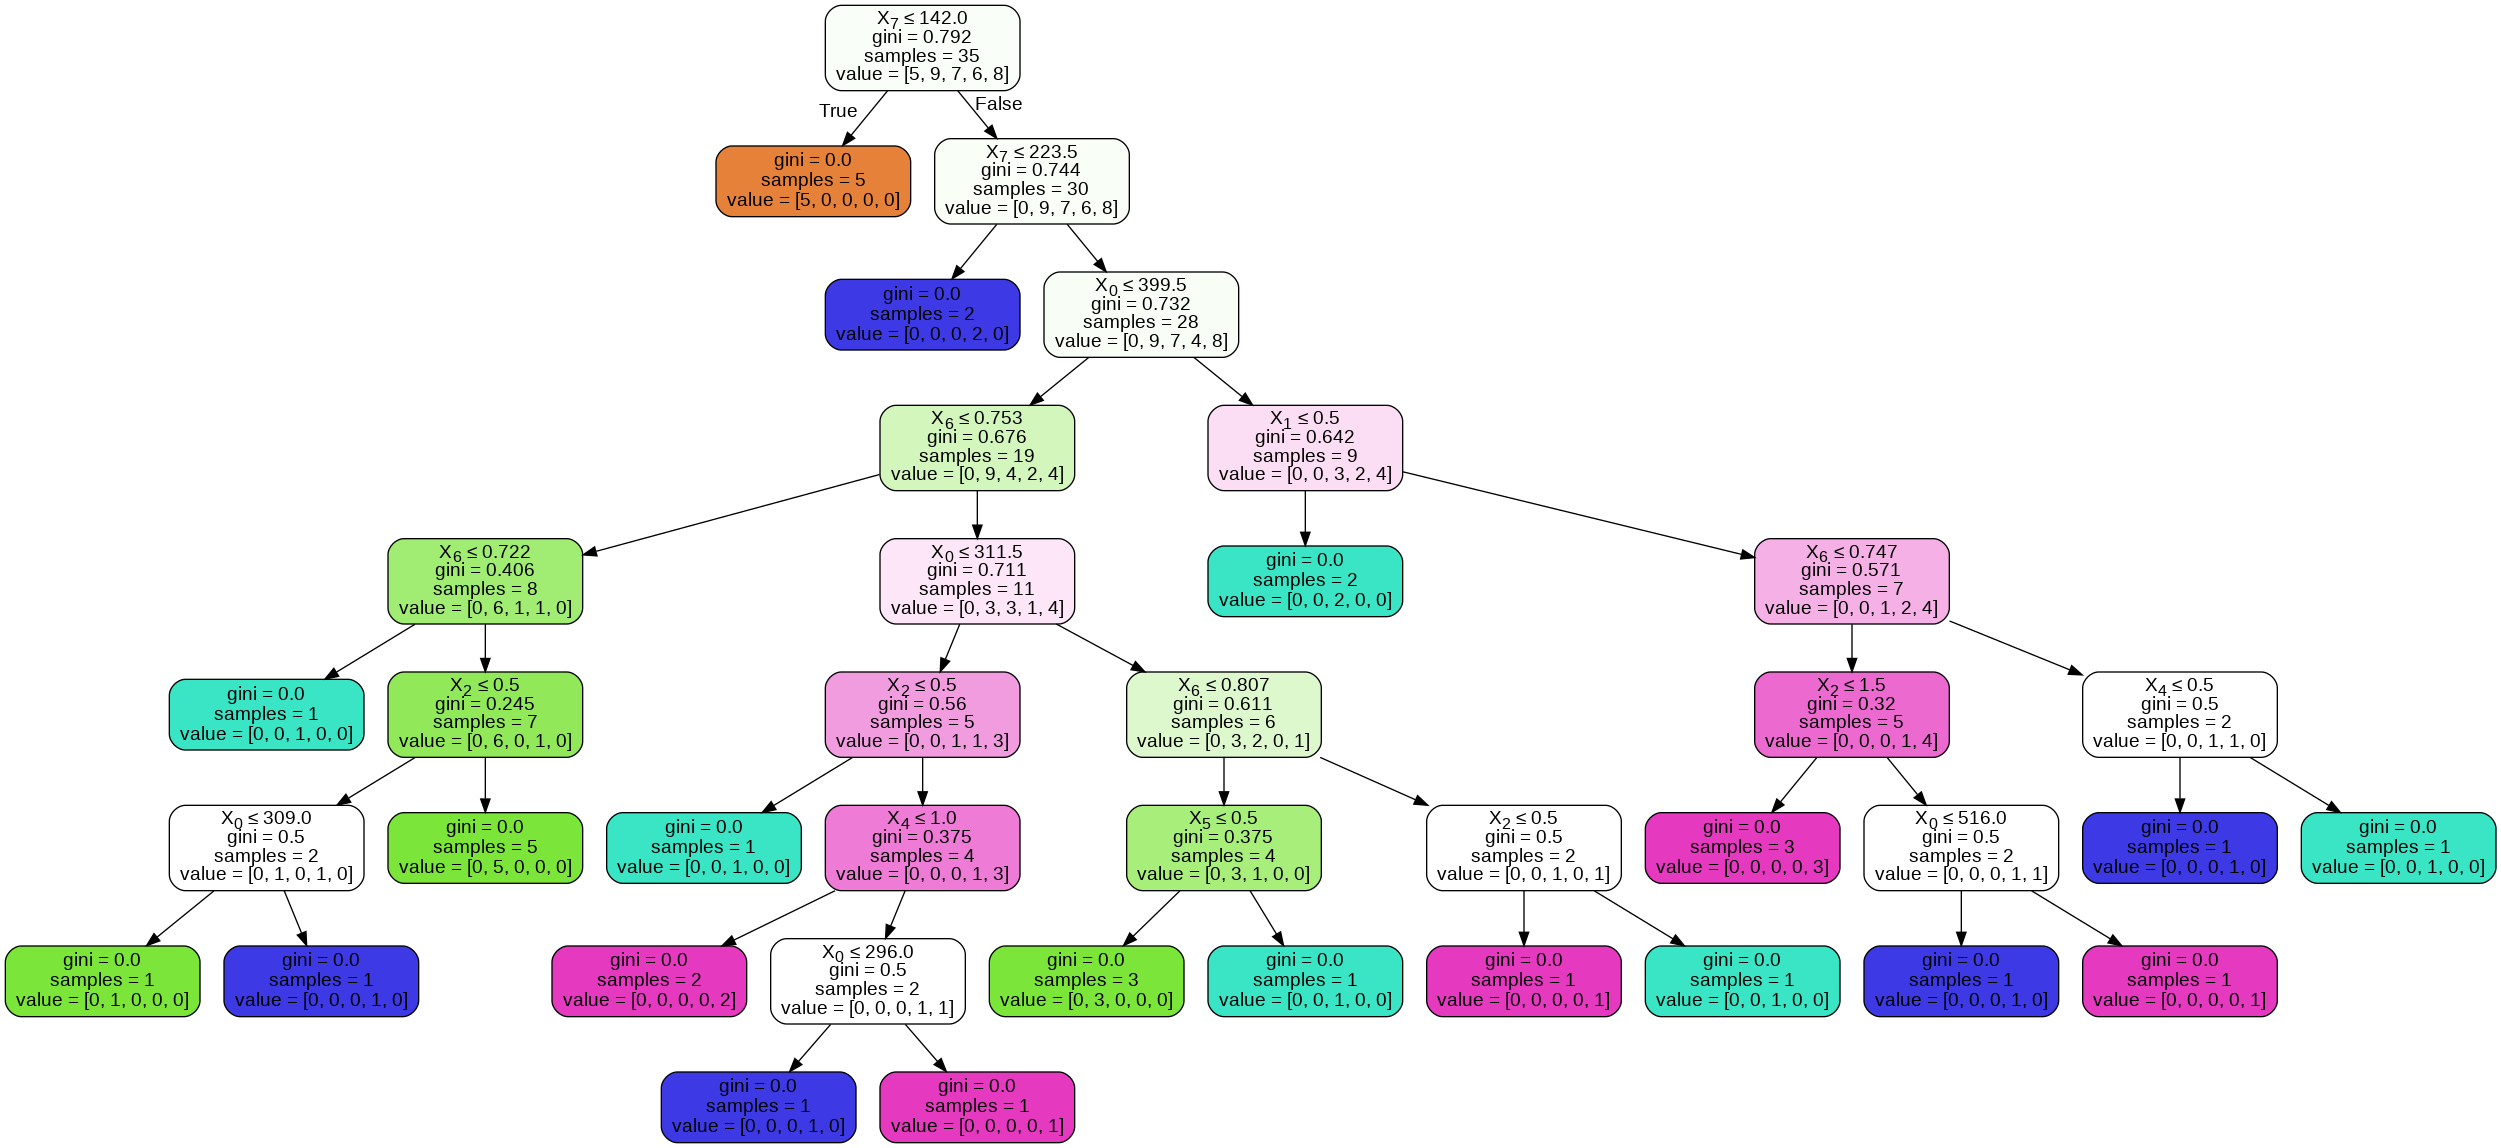

In [74]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(model3, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())